In [34]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [24]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [2]:
#Open Manufacturing workers data
df = pd.read_csv("data/workers-factories-wages-mexico-annual.csv")
df

,Year,State,Border,Jobs,Factories,Average wage
0,2007,Total nacional,No,1902121.0,5140.0,13120.12137
1,2008,Total nacional,No,1738182.0,5254.0,13360.18494
2,2009,Total nacional,No,1645291.0,5214.0,14170.40792
3,2010,Total nacional,No,1810482.0,5108.0,13945.50058
4,2011,Total nacional,No,1879114.0,5079.0,14183.43239
...,...,...,...,...,...,...
280,2017,Otras entidades federativas,No,134260.0,266.0,13080.53332
281,2018,Otras entidades federativas,No,143292.0,264.0,12842.36016
282,2019,Otras entidades federativas,No,142102.0,267.0,12634.71062
283,2020,Otras entidades federativas,No,135569.0,264.0,14349.70094


In [3]:
df2 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Jobs', index='State', columns='Year')
df2

Year,2010,2021
State,,
Aguascalientes,37967.0,63036.0
Baja California,216912.0,364420.0
Chihuahua,245815.0,408068.0
Ciudad de Mexico,51311.0,21499.0
Coahuila de Zaragoza,165669.0,264349.0
Durango,25165.0,46152.0
Guanajuato,70660.0,163990.0
Jalisco,102031.0,156146.0
Mexico,117900.0,138471.0


In [4]:
df2["Jobs pct chg 2010 - 2021"] = (df2[2021] / df2[2010] - 1) * 100
df2

Year,2010,2021,Jobs pct chg 2010 - 2021
State,,,
Aguascalientes,37967.0,63036.0,66.028393
Baja California,216912.0,364420.0,68.003614
Chihuahua,245815.0,408068.0,66.006143
Ciudad de Mexico,51311.0,21499.0,-58.100602
Coahuila de Zaragoza,165669.0,264349.0,59.564553
Durango,25165.0,46152.0,83.397576
Guanajuato,70660.0,163990.0,132.083215
Jalisco,102031.0,156146.0,53.037802
Mexico,117900.0,138471.0,17.447837


In [5]:
df2.sort_values(by= ["Jobs pct chg 2010 - 2021"], ascending = False)

Year,2010,2021,Jobs pct chg 2010 - 2021
State,,,
Guanajuato,70660.0,163990.0,132.083215
Queretaro,52887.0,107124.0,102.552612
San Luis Potosi,46141.0,90954.0,97.121866
Durango,25165.0,46152.0,83.397576
Baja California,216912.0,364420.0,68.003614
Aguascalientes,37967.0,63036.0,66.028393
Chihuahua,245815.0,408068.0,66.006143
Coahuila de Zaragoza,165669.0,264349.0,59.564553
Tamaulipas,162298.0,258257.0,59.125189


In [6]:
df3 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Factories', index='State', columns='Year')
df3

Year,2010,2021
State,,
Aguascalientes,83.0,93.0
Baja California,932.0,928.0
Chihuahua,478.0,488.0
Ciudad de Mexico,135.0,73.0
Coahuila de Zaragoza,373.0,394.0
Durango,74.0,75.0
Guanajuato,218.0,342.0
Jalisco,265.0,286.0
Mexico,309.0,276.0


In [7]:
df3["Factories pct chg 2010 - 2021"] = (df3[2021] / df3[2010] - 1) * 100
df3

Year,2010,2021,Factories pct chg 2010 - 2021
State,,,
Aguascalientes,83.0,93.0,12.048193
Baja California,932.0,928.0,-0.429185
Chihuahua,478.0,488.0,2.092050
Ciudad de Mexico,135.0,73.0,-45.925926
Coahuila de Zaragoza,373.0,394.0,5.630027
Durango,74.0,75.0,1.351351
Guanajuato,218.0,342.0,56.880734
Jalisco,265.0,286.0,7.924528
Mexico,309.0,276.0,-10.679612


In [8]:
df3.sort_values(by= ["Factories pct chg 2010 - 2021"], ascending = False)

Year,2010,2021,Factories pct chg 2010 - 2021
State,,,
Guanajuato,218.0,342.0,56.880734
San Luis Potosi,123.0,177.0,43.902439
Queretaro,188.0,248.0,31.914894
Aguascalientes,83.0,93.0,12.048193
Jalisco,265.0,286.0,7.924528
Coahuila de Zaragoza,373.0,394.0,5.630027
Chihuahua,478.0,488.0,2.092050
Total nacional,5108.0,5184.0,1.487862
Durango,74.0,75.0,1.351351


In [9]:
df4 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Average wage', index='State', columns='Year')
df4

Year,2010,2021
State,,
Aguascalientes,14748.682120,18225.561920
Baja California,13056.746250,17196.476410
Chihuahua,10580.188720,13828.375230
Ciudad de Mexico,22707.691240,23832.278500
Coahuila de Zaragoza,13507.356480,17075.261950
Durango,7479.487038,9464.914593
Guanajuato,12089.007860,17251.151370
Jalisco,15455.902270,20461.988480
Mexico,22604.224250,20998.417970


In [10]:
df4["Wages pct chg 2010 - 2021"] = (df4[2021] / df4[2010] - 1) * 100
df4

Year,2010,2021,Wages pct chg 2010 - 2021
State,,,
Aguascalientes,14748.682120,18225.561920,23.574173
Baja California,13056.746250,17196.476410,31.705680
Chihuahua,10580.188720,13828.375230,30.700648
Ciudad de Mexico,22707.691240,23832.278500,4.952451
Coahuila de Zaragoza,13507.356480,17075.261950,26.414535
Durango,7479.487038,9464.914593,26.544970
Guanajuato,12089.007860,17251.151370,42.701135
Jalisco,15455.902270,20461.988480,32.389479
Mexico,22604.224250,20998.417970,-7.104010


In [11]:
df4.sort_values(by= ["Wages pct chg 2010 - 2021"], ascending = False)

Year,2010,2021,Wages pct chg 2010 - 2021
State,,,
Veracruz de Ignacio de la Llave,16712.966830,26300.530240,57.366017
San Luis Potosi,12885.838530,19035.932620,47.727543
Guanajuato,12089.007860,17251.151370,42.701135
Nuevo Leon,15722.890930,21112.531270,34.278940
Sonora,11689.086040,15660.360180,33.974206
Otras entidades federativas,12702.663200,16852.899730,32.672176
Jalisco,15455.902270,20461.988480,32.389479
Baja California,13056.746250,17196.476410,31.705680
Chihuahua,10580.188720,13828.375230,30.700648


In [12]:
# open population data
dfp = pd.read_csv("data/population-mexico.csv",skiprows=4)
dfp

,Entidad federativa,Grupo quinquenal de edad,Total,Total.1
0,Estados Unidos Mexicanos,Total,"112,336,538","126,014,024"
1,Aguascalientes,Total,"1,184,996","1,425,607"
2,Baja California,Total,"3,155,070","3,769,020"
3,Baja California Sur,Total,"637,026","798,447"
4,Campeche,Total,"822,441","928,363"
5,Coahuila de Zaragoza,Total,"2,748,391","3,146,771"
6,Colima,Total,"650,555","731,391"
7,Chiapas,Total,"4,796,580","5,543,828"
8,Chihuahua,Total,"3,406,465","3,741,869"
9,Ciudad de México,Total,"8,851,080","9,209,944"


In [13]:
dfp = dfp.drop([33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49])


In [14]:
dfp = dfp.drop(["Grupo quinquenal de edad"], axis =1)
dfp

,Entidad federativa,Total,Total.1
0,Estados Unidos Mexicanos,"112,336,538","126,014,024"
1,Aguascalientes,"1,184,996","1,425,607"
2,Baja California,"3,155,070","3,769,020"
3,Baja California Sur,"637,026","798,447"
4,Campeche,"822,441","928,363"
5,Coahuila de Zaragoza,"2,748,391","3,146,771"
6,Colima,"650,555","731,391"
7,Chiapas,"4,796,580","5,543,828"
8,Chihuahua,"3,406,465","3,741,869"
9,Ciudad de México,"8,851,080","9,209,944"


In [15]:
dfp.rename(columns = {"Entidad federativa": "State", "Total":"2010", "Total.1":"2021"}, inplace = True)
dfp

,State,2010,2021
0,Estados Unidos Mexicanos,"112,336,538","126,014,024"
1,Aguascalientes,"1,184,996","1,425,607"
2,Baja California,"3,155,070","3,769,020"
3,Baja California Sur,"637,026","798,447"
4,Campeche,"822,441","928,363"
5,Coahuila de Zaragoza,"2,748,391","3,146,771"
6,Colima,"650,555","731,391"
7,Chiapas,"4,796,580","5,543,828"
8,Chihuahua,"3,406,465","3,741,869"
9,Ciudad de México,"8,851,080","9,209,944"


In [19]:
dfp ["2010"] = dfp ["2010"] .str.replace(",","")
dfp ["2021"] = dfp ["2021"] .str.replace(",","")
dfp

,State,2010,2021
0,Estados Unidos Mexicanos,112336538,126014024
1,Aguascalientes,1184996,1425607
2,Baja California,3155070,3769020
3,Baja California Sur,637026,798447
4,Campeche,822441,928363
5,Coahuila de Zaragoza,2748391,3146771
6,Colima,650555,731391
7,Chiapas,4796580,5543828
8,Chihuahua,3406465,3741869
9,Ciudad de México,8851080,9209944


In [20]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   33 non-null     object
 1   2010    33 non-null     object
 2   2021    33 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [22]:
dfp["2010"] = pd.to_numeric(dfp["2010"], errors='coerce')
dfp["2021"] = pd.to_numeric(dfp["2021"], errors='coerce')
dfp

,State,2010,2021
0,Estados Unidos Mexicanos,112336538,126014024
1,Aguascalientes,1184996,1425607
2,Baja California,3155070,3769020
3,Baja California Sur,637026,798447
4,Campeche,822441,928363
5,Coahuila de Zaragoza,2748391,3146771
6,Colima,650555,731391
7,Chiapas,4796580,5543828
8,Chihuahua,3406465,3741869
9,Ciudad de México,8851080,9209944


In [23]:
dfp["Population pct chg 2010 - 2021"] = (dfp["2021"] / dfp["2010"] - 1) * 100
dfp

,State,2010,2021,Population pct chg 2010 - 2021
0,Estados Unidos Mexicanos,112336538,126014024,12.175456
1,Aguascalientes,1184996,1425607,20.304794
2,Baja California,3155070,3769020,19.459156
3,Baja California Sur,637026,798447,25.339782
4,Campeche,822441,928363,12.878979
5,Coahuila de Zaragoza,2748391,3146771,14.495026
6,Colima,650555,731391,12.425698
7,Chiapas,4796580,5543828,15.578767
8,Chihuahua,3406465,3741869,9.846101
9,Ciudad de México,8851080,9209944,4.054466


In [30]:
## merge
df_jp = pd.merge(df2, dfp,left_on = ["State"], right_on = ["State"])
df_jp

,State,2010,2021,Jobs pct chg 2010 - 2021,2010,2021,Population pct chg 2010 - 2021
0,Aguascalientes,37967.0,63036.0,66.028393,1184996,1425607,20.304794
1,Baja California,216912.0,364420.0,68.003614,3155070,3769020,19.459156
2,Chihuahua,245815.0,408068.0,66.006143,3406465,3741869,9.846101
3,Coahuila de Zaragoza,165669.0,264349.0,59.564553,2748391,3146771,14.495026
4,Durango,25165.0,46152.0,83.397576,1632934,1832650,12.230500
5,Guanajuato,70660.0,163990.0,132.083215,5486372,6166934,12.404591
6,Jalisco,102031.0,156146.0,53.037802,7350682,8348151,13.569748
7,Puebla,71544.0,79592.0,11.249022,5779829,6583278,13.900913
8,Sonora,93235.0,130031.0,39.465866,2662480,2944840,10.605150
9,Tamaulipas,162298.0,258257.0,59.125189,3268554,3527735,7.929531


In [33]:
df_jp.sort_values(by= ["Jobs pct chg 2010 - 2021"], ascending = False)

,State,2010,2021,Jobs pct chg 2010 - 2021,2010,2021,Population pct chg 2010 - 2021
5,Guanajuato,70660.0,163990.0,132.083215,5486372,6166934,12.404591
4,Durango,25165.0,46152.0,83.397576,1632934,1832650,12.230500
1,Baja California,216912.0,364420.0,68.003614,3155070,3769020,19.459156
0,Aguascalientes,37967.0,63036.0,66.028393,1184996,1425607,20.304794
2,Chihuahua,245815.0,408068.0,66.006143,3406465,3741869,9.846101
3,Coahuila de Zaragoza,165669.0,264349.0,59.564553,2748391,3146771,14.495026
9,Tamaulipas,162298.0,258257.0,59.125189,3268554,3527735,7.929531
6,Jalisco,102031.0,156146.0,53.037802,7350682,8348151,13.569748
8,Sonora,93235.0,130031.0,39.465866,2662480,2944840,10.605150
10,Veracruz de Ignacio de la Llave,16303.0,21680.0,32.981660,7643194,8062579,5.487039


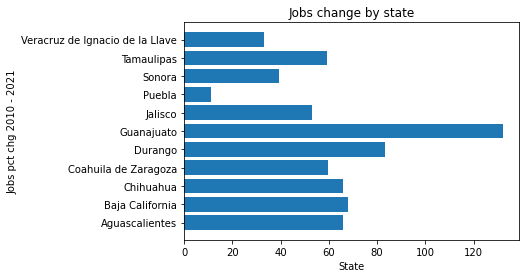

In [48]:
plt.barh(df_jp["State"],df_jp["Jobs pct chg 2010 - 2021"])

# Añadir etiquetas y título
plt.xlabel('State')
plt.ylabel("Jobs pct chg 2010 - 2021")
plt.title('Jobs change by state')

# Mostrar el gráfico
plt.show()

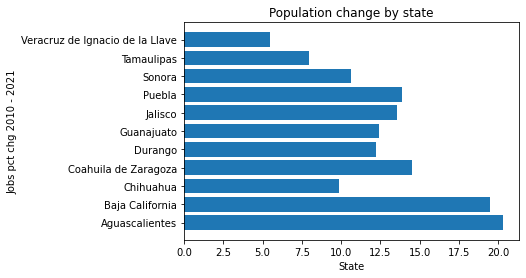

In [49]:
plt.barh(df_jp["State"],df_jp["Population pct chg 2010 - 2021"])

# Añadir etiquetas y título
plt.xlabel('State')
plt.ylabel("Jobs pct chg 2010 - 2021")
plt.title('Population change by state')

# Mostrar el gráfico
plt.show()